In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib

import cfl.util.brain_util as BU
import cfl.util.brain_vis as BV

ModuleNotFoundError: No module named 'pandas'

In [2]:
behav_csv = 'PTSD_Data_Share\Behavior_data\PTSD_PerLight.csv'
mri_dir = 'PTSD_Data_Share\MEMRI_data'

In [4]:
# load one image 

img = BU.load_brain(os.path.join(mri_dir, "PTSD_KO_03_BL.nii"))
mri_dims = img.shape

In [5]:
X, Y = BU.load_data(mri_dir, behav_csv, mri_dims, )

In [6]:
###########FORMAT Y DATA ############ 

Y = pd.read_csv('PTSD_Data_Share\Behavior_data\PTSD_PerLight.csv')

#split ID into one column for each variable 
new = Y["Animal ID"].str.split("_", n=3, expand=True)
Y[ "Genotype"] = new[1]
Y["Animal_Number"] = new[2]
Y["Timepoint"] = new[3]

#drop old ID label 
Y.drop(columns="Animal ID")

#reorder columns 
Y = Y.reindex(columns = ["Genotype", "Animal_Number", "Timepoint", "PerLight"])

#check for NaNs - dont find any
print(Y.isnull().values.any())

NameError: name 'pd' is not defined

In [7]:
Y

,Genotype,Animal_Number,Timepoint,PerLight
0,KO,03,BL,0.676965
1,KO,03,PreF,0.159753
2,KO,03,Fear,0.280408
3,KO,03,D9,0.358919
4,KO,04,BL,0.326555
...,...,...,...,...
74,WT,11,D9,0.403257
75,WT,12,BL,0.350375
76,WT,12,PreF,0.273996
77,WT,12,Fear,0.243884


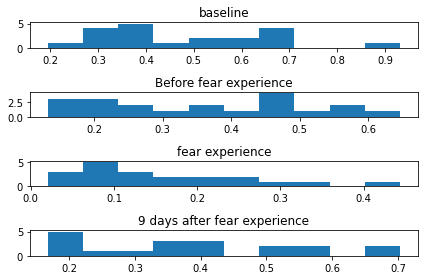

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=1, squeeze=False)
full_name = {"BL": "baseline", "PreF": "Before fear experience", "Fear":"fear experience", "D9": "9 days after fear experience"}

timepoints = Y.Timepoint.unique()
for n, timepoint in enumerate(timepoints):
    ax[n, 0].hist(Y.loc[Y.Timepoint == timepoint]["PerLight"])
    ax[n, 0].title.set_text(full_name[timepoint])
plt.tight_layout()
plt.show()

In [9]:
#check all images are the same shape 
img_shape = (124, 200, 82)
for fp in os.listdir(mri_dir):
    full_path = os.path.join(mri_dir, fp)
    brain = BU.load_brain(full_path)
    assert brain.shape ==  img_shape
    #print(brain.shape)

In [24]:
np.all(np.equal(brain[5], 0) )

#when there's nothing present in the image, that is represented by a 0 

True

In [11]:
mask = np.equal(img, 0) 

In [14]:
#check all images have the same mask  
img_shape = (124, 200, 82)
for fp in os.listdir(mri_dir):
    full_path = os.path.join(mri_dir, fp)
    brain = BU.load_brain(full_path)
    if np.all(mask == np.equal(brain, 0)): 
        print("brain {} is same".format(full_path))
    else: 
        print("brain {} is different".format(full_path))


brain PTSD_Data_Share\MEMRI_data\PTSD_KO_03_BL.nii is same
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_03_D9.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_03_Fear.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_03_PreF.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_04_BL.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_04_Fear.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_04_PreF.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_05_BL.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_05_D9.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_05_Fear.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_05_PreF.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_06_BL.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_06_D9.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_06_Fear.nii is different
brain PTSD_Data_Share\MEMRI_data\PTSD_KO_06_PreF.nii is different
brain PTSD_Data_Share\MEMRI_d

In [17]:
# specify labels for plot (note the labels below are specifically for RAS orientation)
dir_labels = { 'saggital' :   ['P', 'A', 'D', 'V'],
               'coronal' :    ['L', 'R', 'D', 'V'],
               'horizontal' : ['L', 'R', 'A', 'P']} 
# generate interactive plots
mask = np.ones((np.prod(mri_dims), ))
BV.plot_interactive_panels(X[6:9], mri_dims, mask, dir_labels, figsize=(8,3), colormap='Blues')


interactive(children=(IntSlider(value=0, continuous_update=False, description='slice', max=123, step=5), Outpu…

interactive(children=(IntSlider(value=0, continuous_update=False, description='slice', max=199, step=5), Outpu…

interactive(children=(IntSlider(value=0, continuous_update=False, description='slice', max=81, step=5), Output…

In [22]:
X[6]
X[6].shape

(2033600,)

In [21]:
new_img = BU.unflatten(X[6], img_shape) 
new_img.shape

(124, 200, 82)